In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=465044665732f2c02a9a3593d2b86a5b


In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

new norfolk au
ketchikan us
mataura pf
bengkulu id
hobart au
victor harbor au
tuktoyaktuk ca
urla tr
hermanus za
ushuaia ar
mys shmidta ru
itarema br
bambous virieux mu
busselton au
kapoeta sd
pangnirtung ca
carnarvon au
hilo us
avarua ck
sorong id
tasiilaq gl
rikitea pf
ushuaia ar
marawi sd
lagoa pt
nizhneyansk ru
taolanaro mg
avarua ck
straumen no
coahuayana mx
cabedelo br
punta arenas cl
arraial do cabo br
esna eg
albany au
avarua ck
dikson ru
waingapu id
cagayan de tawi-tawi ph
san jeronimo mx
yulara au
rikitea pf
rajpipla in
flin flon ca
sabha ly
komsomolskiy ru
mbandaka cd
atuona pf
haines junction ca
kahului us
sinnamary gf
rikitea pf
raudeberg no
provideniya ru
lerwick gb
simao cn
hilo us
torbay ca
saskylakh ru
port alfred za
goderich sl
lolua tv
rikitea pf
ushuaia ar
sao joao da barra br
ushuaia ar
katsuura jp
port shepstone za
deda ro
kapaa us
provideniya ru
belushya guba ru
arraial do cabo br
bredasdorp za
castro cl
saint-pierre pm
taolanaro mg
mar del plata ar
utete tz
riki

bambous virieux mu
chuka ke
kousseri cm
rikitea pf
domoni km
volksrust za
nome us
uglovka ru
saskylakh ru
sola vu
kahului us
esperance au
rikitea pf
busselton au
toamasina mg
tezu in
busselton au
lompoc us
madimba tz
khatanga ru
tiksi ru
lebu cl
ushuaia ar
ekhabi ru
qaanaaq gl
salsomaggiore terme it
henties bay na
bahir dar et
kaeo nz
albany au
mnogovershinnyy ru
new norfolk au
auki sb
west bay ky
taolanaro mg
lithakia gr
ketchikan us
anadyr ru
illoqqortoormiut gl
east london za
antsohihy mg
butaritari ki
ksenyevka ru
castro cl
verkhnevilyuysk ru
east london za
san quintin mx
stephenville ca
kodiak us
hamilton bm
new norfolk au
mehamn no
upernavik gl
butaritari ki
pokrovsk ru
albany au
cape town za
rikitea pf
progreso mx
puerto ayora ec
rikitea pf
port-cartier ca
loreto mx
banfora bf
zadar hr
rikitea pf
gushikawa jp
bredasdorp za
albany au
barbar sd
saint-georges gf
ushuaia ar
kavieng pg
jamestown sh
chuy uy
bambous virieux mu
kapaa us
jamestown sh
margate za
ust-kut ru
miyako jp
puert

ribeira grande pt
rio branco br
atuona pf
upernavik gl
thinadhoo mv
khatanga ru
sorland no
mandan us
yellowknife ca
qaanaaq gl
alyangula au
punta arenas cl
kapaa us
tawkar sd
hilo us
impfondo cg
tabiauea ki
kahului us
rikitea pf
lamar us
saskylakh ru
illoqqortoormiut gl
barrow us
rikitea pf
eureka us
hobart au
port-cartier ca
alice springs au
cidreira br
mataura pf
rikitea pf
rikitea pf
mar del plata ar
ha tinh vn
mataura pf
ponta do sol cv
gaoual gn
mataura pf
nizhneyansk ru
muros es
pombas cv
albany au
rikitea pf
lagoa pt
hamilton bm
kununurra au
mataura pf
hambantota lk
aklavik ca
uusikaupunki fi
mataura pf
ribeira grande pt
pribelskiy ru
kodiak us
barentsburg sj
pitimbu br
sentyabrskiy ru
guerrero negro mx
san policarpo ph
bambous virieux mu
nalhati in
hermanus za
kavieng pg
albany au
castro cl
vaini to
tumannyy ru
port alfred za
new norfolk au
fukuma jp
albany au
cape town za
port alfred za
nizhneyansk ru
obo cf
hilo us
tolaga bay nz
dikson ru
jamestown sh
dikson ru
purgstall at
j

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

641

In [8]:
import requests
requests.__version__

'2.25.1'

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | ketchikan
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | bengkulu
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | victor harbor
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | urla
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 12 of Set 1 | itarema
Processing Record 13 of Set 1 | bambous virieux
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | kapoeta
Processing Record 16 of Set 1 | pangnirtung
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | sorong
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 | marawi
Processing Record 24 of Set 1 | 

Processing Record 34 of Set 4 | houma
Processing Record 35 of Set 4 | ballina
Processing Record 36 of Set 4 | abomsa
Processing Record 37 of Set 4 | gornopravdinsk
Processing Record 38 of Set 4 | yar-sale
Processing Record 39 of Set 4 | hithadhoo
Processing Record 40 of Set 4 | port elizabeth
Processing Record 41 of Set 4 | daru
Processing Record 42 of Set 4 | kupang
Processing Record 43 of Set 4 | port hedland
Processing Record 44 of Set 4 | sabla
Processing Record 45 of Set 4 | mwinilunga
Processing Record 46 of Set 4 | swellendam
Processing Record 47 of Set 4 | dafeng
Processing Record 48 of Set 4 | husavik
Processing Record 49 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 50 of Set 4 | lubao
Processing Record 1 of Set 5 | lapeer
Processing Record 2 of Set 5 | kajaani
Processing Record 3 of Set 5 | oranjestad
Processing Record 4 of Set 5 | teya
Processing Record 5 of Set 5 | kodiak
Processing Record 6 of Set 5 | hofn
Processing Record 7 of Set 5 | faanui
Processi

Processing Record 26 of Set 8 | upernavik
Processing Record 27 of Set 8 | pokrovsk
Processing Record 28 of Set 8 | progreso
Processing Record 29 of Set 8 | port-cartier
Processing Record 30 of Set 8 | loreto
Processing Record 31 of Set 8 | banfora
Processing Record 32 of Set 8 | zadar
Processing Record 33 of Set 8 | gushikawa
Processing Record 34 of Set 8 | barbar
City not found. Skipping...
Processing Record 35 of Set 8 | saint-georges
Processing Record 36 of Set 8 | ust-kut
Processing Record 37 of Set 8 | miyako
Processing Record 38 of Set 8 | puerto colombia
Processing Record 39 of Set 8 | hirara
Processing Record 40 of Set 8 | beroroha
Processing Record 41 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 42 of Set 8 | kathmandu
Processing Record 43 of Set 8 | pontianak
Processing Record 44 of Set 8 | paamiut
Processing Record 45 of Set 8 | vila franca do campo
Processing Record 46 of Set 8 | fortuna
Processing Record 47 of Set 8 | kropotkin
Processing Record 48

Processing Record 17 of Set 12 | blagodatnoye
Processing Record 18 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 19 of Set 12 | yerbogachen
Processing Record 20 of Set 12 | veselynove
Processing Record 21 of Set 12 | karwar
Processing Record 22 of Set 12 | toktogul
Processing Record 23 of Set 12 | sapozhok
Processing Record 24 of Set 12 | havelock
Processing Record 25 of Set 12 | atar
Processing Record 26 of Set 12 | riyadh
Processing Record 27 of Set 12 | plouzane
Processing Record 28 of Set 12 | brigantine
Processing Record 29 of Set 12 | la tuque
Processing Record 30 of Set 12 | maracacume
Processing Record 31 of Set 12 | seymchan
Processing Record 32 of Set 12 | san juan del sur
Processing Record 33 of Set 12 | vao
Processing Record 34 of Set 12 | fukuma
Processing Record 35 of Set 12 | xining
Processing Record 36 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 37 of Set 12 | adre
Processing Record 38 of Set 12 | vilyuysk
Processing Record 3

In [12]:
len(city_data)

589

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,64.99,52,26,1.01,AU,2021-02-14 09:10:58
1,Ketchikan,55.3422,-131.6461,33.80,34,90,3.44,US,2021-02-14 09:10:58
2,Mataura,-46.1927,168.8643,59.29,73,96,1.68,NZ,2021-02-14 09:10:59
3,Bengkulu,-3.8004,102.2655,84.11,73,99,6.17,ID,2021-02-14 09:10:59
4,Hobart,-42.8794,147.3294,64.99,68,75,10.36,AU,2021-02-14 09:06:31
5,Victor Harbor,-35.5667,138.6167,64.00,75,0,1.99,AU,2021-02-14 09:10:59
6,Tuktoyaktuk,69.4541,-133.0374,-5.67,92,99,8.39,CA,2021-02-14 09:10:59
7,Urla,38.3229,26.7640,51.80,100,75,6.91,TR,2021-02-14 09:10:59
8,Hermanus,-34.4187,19.2345,66.99,94,82,3.00,ZA,2021-02-14 09:11:00
9,Ushuaia,-54.8000,-68.3000,41.00,75,40,11.50,AR,2021-02-14 09:11:00


In [14]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2021-02-14 09:10:58,-42.7826,147.0587,64.99,52,26,1.01
1,Ketchikan,US,2021-02-14 09:10:58,55.3422,-131.6461,33.80,34,90,3.44
2,Mataura,NZ,2021-02-14 09:10:59,-46.1927,168.8643,59.29,73,96,1.68
3,Bengkulu,ID,2021-02-14 09:10:59,-3.8004,102.2655,84.11,73,99,6.17
4,Hobart,AU,2021-02-14 09:06:31,-42.8794,147.3294,64.99,68,75,10.36
5,Victor Harbor,AU,2021-02-14 09:10:59,-35.5667,138.6167,64.00,75,0,1.99
6,Tuktoyaktuk,CA,2021-02-14 09:10:59,69.4541,-133.0374,-5.67,92,99,8.39
7,Urla,TR,2021-02-14 09:10:59,38.3229,26.7640,51.80,100,75,6.91
8,Hermanus,ZA,2021-02-14 09:11:00,-34.4187,19.2345,66.99,94,82,3.00
9,Ushuaia,AR,2021-02-14 09:11:00,-54.8000,-68.3000,41.00,75,40,11.50


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

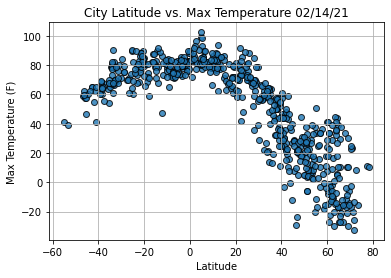

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

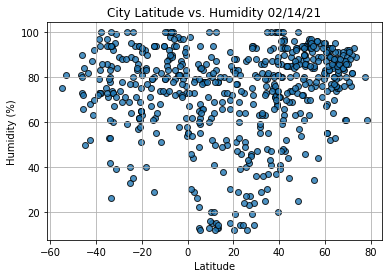

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

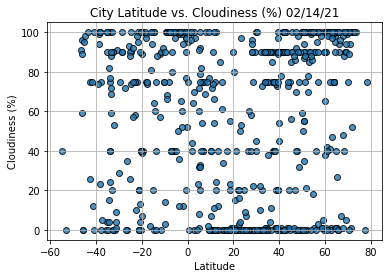

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

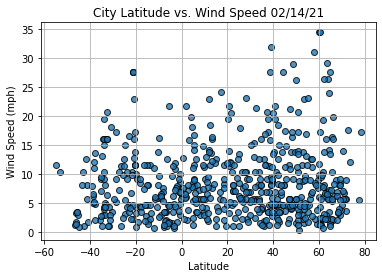

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                      Kapoeta
Country                        SS
Date          2021-02-14 09:11:01
Lat                        4.7717
Lng                       33.5903
Max Temp                    98.89
Humidity                       22
Cloudiness                     72
Wind Speed                  18.14
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4      False
       ...  
584     True
585    False
586    False
587     True
588    False
Name: Lat, Length: 589, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ketchikan,US,2021-02-14 09:10:58,55.3422,-131.6461,33.80,34,90,3.44
6,Tuktoyaktuk,CA,2021-02-14 09:10:59,69.4541,-133.0374,-5.67,92,99,8.39
7,Urla,TR,2021-02-14 09:10:59,38.3229,26.7640,51.80,100,75,6.91
13,Kapoeta,SS,2021-02-14 09:11:01,4.7717,33.5903,98.89,22,72,18.14
14,Pangnirtung,CA,2021-02-14 09:11:01,66.1451,-65.7125,-20.78,80,94,2.06
...,...,...,...,...,...,...,...,...,...
580,Mingshui,CN,2021-02-14 09:12:53,36.7167,117.5000,53.01,74,85,1.99
582,Zhumadian,CN,2021-02-14 09:12:54,32.9794,114.0294,67.68,36,0,3.91
583,Fallon,US,2021-02-14 09:09:18,39.4735,-118.7774,36.00,74,75,3.44
584,Pervoye Maya,RU,2021-02-14 09:12:54,56.1640,44.7196,3.20,78,0,8.95


In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ketchikan,US,2021-02-14 09:10:58,55.3422,-131.6461,33.80,34,90,3.44
6,Tuktoyaktuk,CA,2021-02-14 09:10:59,69.4541,-133.0374,-5.67,92,99,8.39
7,Urla,TR,2021-02-14 09:10:59,38.3229,26.7640,51.80,100,75,6.91
13,Kapoeta,SS,2021-02-14 09:11:01,4.7717,33.5903,98.89,22,72,18.14
14,Pangnirtung,CA,2021-02-14 09:11:01,66.1451,-65.7125,-20.78,80,94,2.06


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

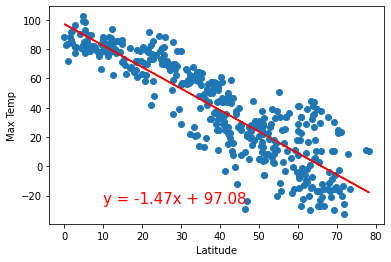

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \ for Maximum Temperature", 'Max Temp',(10,-25))

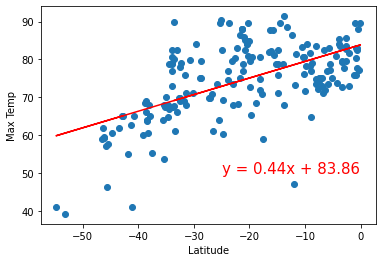

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-25,50))

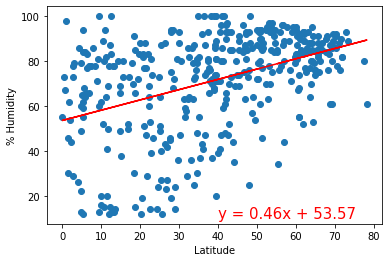

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

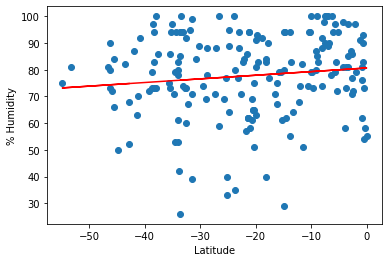

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-25,15))

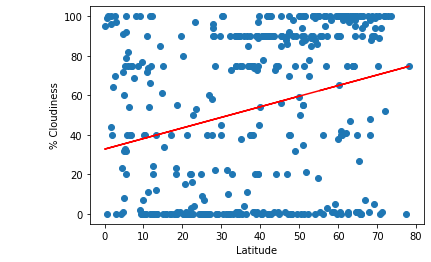

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-25,15))

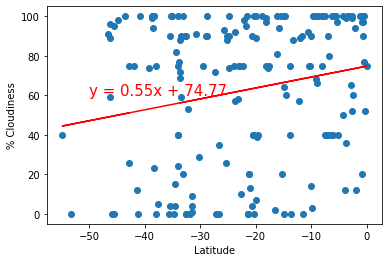

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for % Cloudiness', '% Cloudiness',(-50,60))

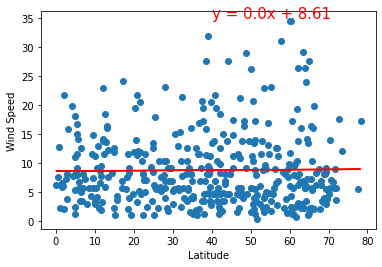

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

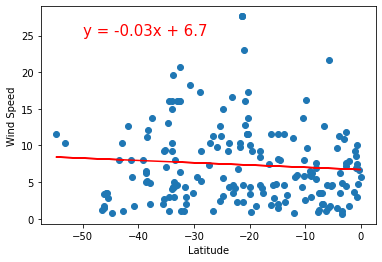

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))